# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
In my opinion,classification is better since our goal is to identify pass or not pass. we don't need to calculate the possbility of pass and that is why classification is used in the model.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [13]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("/Users/houxiaohui/Desktop/student_intervention/student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [14]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns)-1

# TODO: Calculate passing students
n_passed = student_data['passed'].value_counts()['yes']

# TODO: Calculate failing students
n_failed = student_data['passed'].value_counts()['no']
# TODO: Calculate graduation rate
grad_rate = float(n_passed)/n_students*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [15]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [16]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [17]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train,X_test,y_train,y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: **
#1. SVM
By using kernel trick, SVM fits data into high-dimension space and sepereate the figure by hyperplane. The seperated hyperplane is WX+b=0. For prediction, WX+b>1, the result is positive while WX+b < 1, the result is negative. SVM will cost more time than other algorithms, but it is worthwhile kernel trick in this model produeces high accuracy.

Advantages:
a.effective with many features and in other words, in high dimension space

b.effective when data size is small

c.only support vectors have an effect on the results and that means the model can effectively deal with outliers problmes

d.SVM uses kernel to seperate nonlinear data

Disadvantages:
a.it is a classfication model, it cannot provide probability of a result

b.if the number of features is much greater than the sample, it will have over-fitting problem

c.SVM works well only in binary classification, but for the multi-class classification, DecisionTree is a better model.

d.Another problem is interpretability. SVM is a complex model and is explained by many tough math funcions and therefore, it is hard to explain to people who have little knowledge in machine learning. 

#2. Decisiontree
DecisionTree helps to fit multi-class classification that cannot be fitted by SVM.Theoretically，a decision tree can has N leaf node with N sample size data.Desiciontree model seperates data by choosing the specific feature based on information gain or gini-efficient.Which feature should be chose depends on the one that has largest information gain.

Advantages:
a.trees can be visualised and that is simple to understand. Unlike SVM, DecisionTree model can be easily understood by a tree picture.

b.require little data and do not need to normalize the data

c.able to handle both numerical and categorical data

Disadvantages:

a.without pruning, the decision tree train error could be 0. However, this model may produce a big tree that has serious over-fitting problem in testing data. This problem can be mitigated by pruning. For pruning, we can set parameter max_depth to see which depth is best to predict the testing data.

b.decision tree is unstable and even a tiny change in the training data will produce a tree completely different.

c.practical decision-tree learning algorithms are based on greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. 

#3. naive_bayes
P(y|X)=p(y)p(X|y)/p(X)
p(X|Y)=P(x1|y)p(x2|y)...p(xn|y)
The probability of result y=yi can be calculated by prior probabilities that are obtained in training data set.

Advantages:
a.the probablity of every y=yi can be calculated 

b.the time cost is less than other models

c.the needed data size is smaller that others

d.Gaussian NB can fit constant data well

e.Over-fitting problem in Naive_bayes is not as serious as that in DecisionTree

Disadvantages:
a.if the features are no independent,naive_bayes generates poor performance

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [20]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    print '--------------------------------------------------------------------------------------------'

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [21]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# TODO: Initialize the three models
clf_A = SVC()
clf_B = DecisionTreeClassifier()
clf_C = GaussianNB()
clf_list = [clf_A,clf_B,clf_C]
# TODO: Set up the training set sizes
X_train100,X_test100,y_train100,y_test100 = train_test_split(X_all, y_all, train_size=100, random_state=100)
X_train200,X_test200,y_train200,y_test200 = train_test_split(X_all, y_all, train_size=200, random_state=200)
X_train300,X_test300,y_train300,y_test300 = train_test_split(X_all, y_all, train_size=300, random_state=300)


# TODO: Execute the 'train_predict' function for each classifier and each training set size
for clf in clf_list:
    train_predict(clf, X_train100, y_train100, X_test100, y_test100)
    train_predict(clf, X_train200, y_train200, X_test200, y_test200)
    train_predict(clf, X_train300, y_train300, X_test300, y_test300)


Training a SVC using a training set size of 100. . .
Trained model in 0.0141 seconds
Made predictions in 0.0051 seconds.
F1 score for training set: 0.8442.
Made predictions in 0.0054 seconds.
F1 score for test set: 0.8033.
--------------------------------------------------------------------------------------------
Training a SVC using a training set size of 200. . .
Trained model in 0.0075 seconds
Made predictions in 0.0044 seconds.
F1 score for training set: 0.8562.
Made predictions in 0.0057 seconds.
F1 score for test set: 0.8194.
--------------------------------------------------------------------------------------------
Training a SVC using a training set size of 300. . .
Trained model in 0.0086 seconds
Made predictions in 0.0054 seconds.
F1 score for training set: 0.8633.
Made predictions in 0.0018 seconds.
F1 score for test set: 0.8344.
--------------------------------------------------------------------------------------------
Training a DecisionTreeClassifier using a training s

# modifying decision tree model
DecisionTree predicts poorest among three models and it may be a result of over-fitting. In order to assess whether decision tree is the best model, I try some methods to mitigate over-fitting problem. 
1. when applying decisiontree, we don't need to change the features into dummy variables.
2. I use boosting to get data randomly.
3. I limit the depth as 6 because there are 31 features in the data and that is really dangerous.

In [22]:
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_allt = student_data[feature_cols]
y_allt = student_data[target_col]


In [23]:
Xt_train100,Xt_test100,yt_train100,yt_test100 = train_test_split(X_all, y_all, train_size=100, random_state=10)
Xt_train200,Xt_test200,yt_train200,yt_test200 = train_test_split(X_all, y_all, train_size=200, random_state=20)
Xt_train300,Xt_test300,yt_train300,yt_test300 = train_test_split(X_all, y_all, train_size=300, random_state=30)

In [24]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=6))
train_predict(DecisionTreeClassifier(), Xt_train100, yt_train100, Xt_test100, yt_test100)
train_predict(DecisionTreeClassifier(), Xt_train200, yt_train200, Xt_test200, yt_test200)
train_predict(bagging, Xt_train300, yt_train300, Xt_test300, yt_test300)

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0025 seconds
Made predictions in 0.0008 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.6614.
--------------------------------------------------------------------------------------------
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0035 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.7500.
--------------------------------------------------------------------------------------------
Training a BaggingClassifier using a training set size of 300. . .
Trained model in 0.0347 seconds
Made predictions in 0.0039 seconds.
F1 score for training set: 0.9393.
Made predictions in 0.0019 seconds.
F1 score for test set: 0.7761.
--------------------------------------------------------------------------------------------


It seems that the f1_scores have been imporved slightly so I use this updated figure as f1_scores.

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVM**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0022          |         0.0030         |      0.8442      |     0.8033      |
| 200               |         0.0059          |         0.0029         |      0.8562      |     0.8194      |
| 300               |         0.0068          |         0.0018         |      0.8633      |     0.8344      |

** Classifer 2 - DecisionTree**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0023          |         0.0006         |      1.0000      |      0.6754     |
| 200               |         0.0024          |         0.0005         |      1.0000      |      0.7280     |
| 300               |         0.0442          |         0.0029         |      0.9481      |      0.7826     |

** Classifer 3 - Naive_Bayes**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0017          |         0.0007         |     0.8271       |     0.7424      |
| 200               |         0.0011          |         0.0005         |     0.7568       |     0.7576      |
| 300               |         0.0012          |         0.0004         |     0.7595       |     0.7761      |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
According to the above table, obviously SVM model should be chosen.
One of the advantages of SVM is that it can fit data with many features and f1_scores of testing data are all above 0.8 can prove this advantage. Compared to DecisionTree and Gausian naive bayes, SVM gets better f1_scores in all three testing data. Although DecisionTree has no error in training set, this model predicts poorestly in testing data set and this over-fitting problem can be a result of a big tree with many features.
Despite the longest time cost in SVM, we still have no reason to abandon SVM since the time consumed is far less than 0.01 second, the difference in time-consuming can be ignored.


### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **
SVM is a very good algorithm using in classification problem. 
The logic behind SVM is :
Firstly, it maps training data by a kernel function. 
Secondly, we can imagine the data is in the space and seperated into two catagories, passed and failed
Thirdly,SVM helps us find a decision boundary that seperate these two catagories. In other words, students will fail below the hyperplane while they will pass above the hyperplane. 

As is shown in the below image, the black line seperate points into blue part and red part. SVM is a algorithm to calculate the function of black line and predict which part of data fall in based on the funcion. When the data has many features, the data is in space and we use a plane to seperate it.

For simplicity,you just need to know our clever model knows how to calculate the decision boundary and use this boundary to seperate two diffent categories.

After all, what I hope your board to understand is that SVM is a robust funcion and its effectiveness can be proven by f1_score testing and the school can use this model to help students learn better.

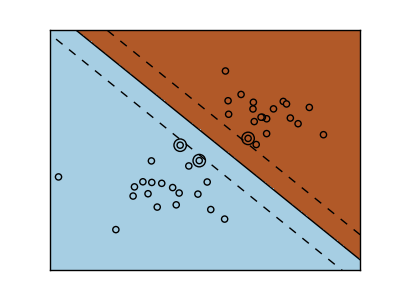

In [1]:
from IPython.display import Image
Image(filename='/Users/houxiaohui/Desktop/student_intervention/plot_svm_margin_001.png')


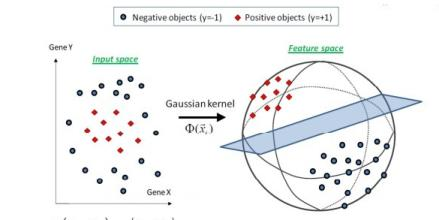

In [2]:
Image(filename='/Users/houxiaohui/Desktop/student_intervention/high.jpg')

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [27]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn import grid_search
from sklearn.metrics import f1_score
# TODO: Create the parameters list you wish to tune
parameters = {'C': [1, 10,100], 'gamma': [0.001, 0.0001,0.01,'auto'], 'kernel': ['rbf','linear','sigmoid']}

# TODO: Initialize the classifier
clf = SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = grid_search.GridSearchCV(clf, parameters,scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train300,y_train300)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train300, y_train300))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))
print clf

Made predictions in 0.0068 seconds.
Tuned model has a training F1 score of 0.8205.
Made predictions in 0.0018 seconds.
Tuned model has a testing F1 score of 0.7945.
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

As the tuned model testing and training F1_score is less than the untuned model. Therefore, the final model is svm.SVC with the dafault parameters.

The best_estimator is (C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.